In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset
df = pd.read_csv('ToyotaCorolla - MLR.csv')




In [32]:
# Display the first few rows of the dataset and summary statistics
df.head()




,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [33]:
print(df.describe())

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

In [34]:
df.shape

(1436, 11)

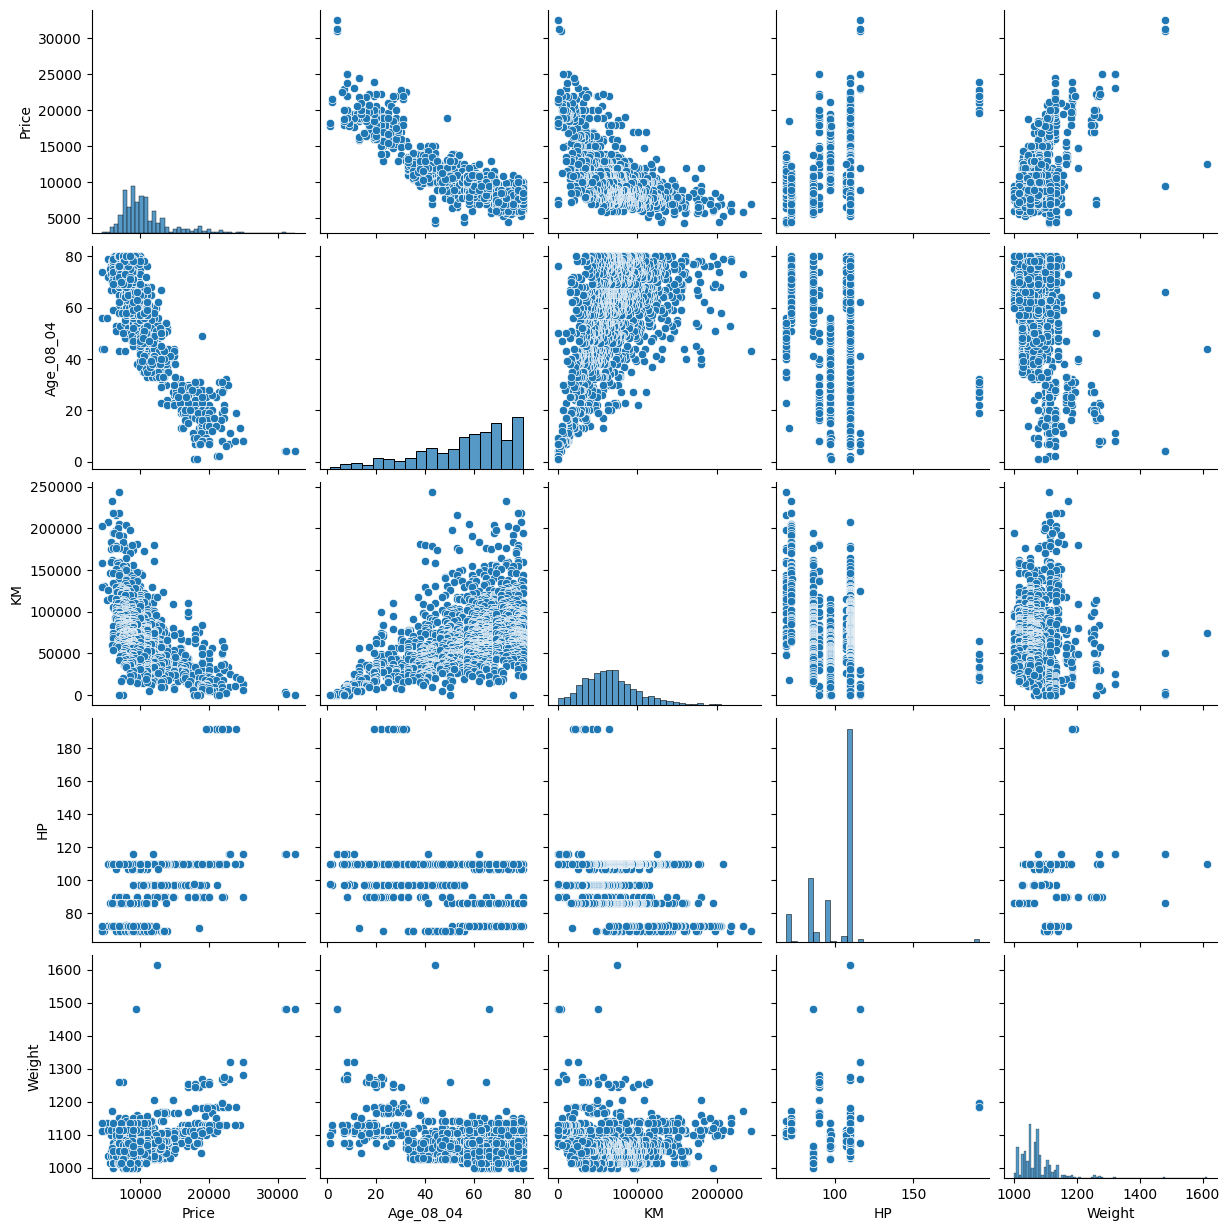

In [35]:
# Visualize the relationships between variables
sns.pairplot(df[['Price', 'Age_08_04', 'KM', 'HP', 'Weight']])
plt.show()



In [36]:
l=LabelEncoder()
df['Fuel_Type']=l.fit_transform(df['Fuel_Type'])


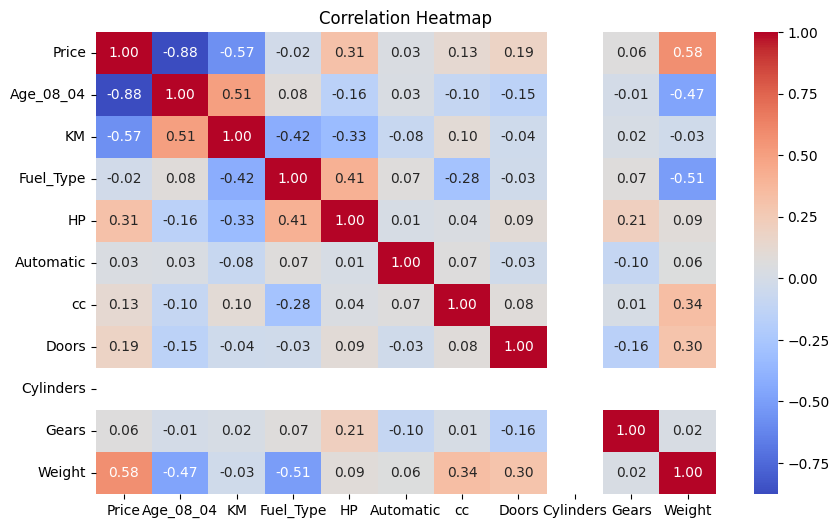

In [37]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [38]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the transformations
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


In [39]:
# Separate features and target variable
X = df.drop(columns=['Price'])
y = df['Price']




In [40]:
# One-hot encode categorical variables using pandas.get_dummies()
X_encoded = pd.get_dummies(X, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [41]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Model 1: Basic Multiple Linear Regression
model1 = LinearRegression()
model1.fit(X_train_transformed, y_train)

# Model coefficients and intercept
coefficients1 = model1.coef_
intercept1 = model1.intercept_




In [43]:
# Get the feature names from X_encoded
feature_names = X_encoded.columns

# Get the feature names from X_encoded after one-hot encoding
feature_names = X_encoded.columns

# Ensure that the number of features matches the number of coefficients
if len(feature_names) == len(model1.coef_):
# Combine feature names and coefficients for interpretation
    model1_coefficients = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': model1.coef_
    })

    # Display the coefficients
    print(model1_coefficients)
    print(f"Intercept: {model1.intercept_}")
else:
    print("Mismatch between the number of features and coefficients!")

Mismatch between the number of features and coefficients!


In [44]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model1.predict(X_test_transformed)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 2232352.8319208226
Root Mean Squared Error: 1494.106031016816
R^2 Score: 0.8326921861635721


In [45]:
from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_transformed, y_train)
y_pred_lasso = lasso.predict(X_test_transformed)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression - MSE: {lasso_mse}, R^2: {lasso_r2}")

# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_transformed, y_train)
y_pred_ridge = ridge.predict(X_test_transformed)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression - MSE: {ridge_mse}, R^2: {ridge_r2}")


Lasso Regression - MSE: 2231159.4981673635, R^2: 0.8327816227699247
Ridge Regression - MSE: 2231551.4905072744, R^2: 0.8327522441786495
